<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Arboles/SRT%20v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v4 - Ensayo
### Arboles de regresion - Nuevo Dataset

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Importamos Datos

In [2]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/alfanumerico_SRT.csv

--2023-05-08 13:48:54--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/alfanumerico_SRT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29796040 (28M) [text/plain]
Saving to: ‘alfanumerico_SRT.csv’

alfanumerico_SRT.cs 100%[===================>]  28.42M   131MB/s    in 0.2s    

2023-05-08 13:48:55 (131 MB/s) - ‘alfanumerico_SRT.csv’ saved [29796040/29796040]



In [3]:
df = pd.read_csv('/content/alfanumerico_SRT.csv', header=0, usecols=[1,2,3,4])
df

,codigo,año,mes,total_cp
0,X5001COC,1996,5,1
1,B1602EIB,1996,7,1
2,B1625XAF,1996,7,1
3,B1651FNF,1996,7,1
4,B1688GEV,1996,7,1
...,...,...,...,...
1166442,X5901AEA,2023,5,1
1166443,X5960FLM,2023,5,1
1166444,X5971ALF,2023,5,1
1166445,Y4500XAL,2023,5,1


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166447 entries, 0 to 1166446
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   codigo    1166447 non-null  object
 1   año       1166447 non-null  int64 
 2   mes       1166447 non-null  int64 
 3   total_cp  1166447 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 35.6+ MB


#### Verificamos cantidad de registros por codigo

In [5]:
# codigos unicos
contador = df['codigo'].value_counts()
contador

B1900AWW    231
B1902CLF    217
G4200AAA    214
S2000AAA    212
S2000CMO    209
           ... 
B1610BTD      1
B1609KJN      1
B1609JIE      1
B1609IYA      1
X5011EKT      1
Name: codigo, Length: 205186, dtype: int64

### Transformacion

#### LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [8]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [9]:
X_encoded.shape

(1166447,)

#### Embeddings

In [10]:
tamano_embedding = 50

In [11]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [12]:
matriz_embedding

array([[0.32653033, 0.61174752, 0.88211764, ..., 0.26720338, 0.1208843 ,
        0.15170092],
       [0.19898143, 0.69731844, 0.03483659, ..., 0.97802971, 0.78119642,
        0.01545656],
       [0.51286677, 0.45182568, 0.516654  , ..., 0.59072826, 0.00858604,
        0.84781678],
       ...,
       [0.89505477, 0.29591463, 0.08022813, ..., 0.60172821, 0.74781572,
        0.53773811],
       [0.48029604, 0.67669575, 0.00865717, ..., 0.96332349, 0.82993892,
        0.44240867],
       [0.43211904, 0.81613542, 0.66662023, ..., 0.42117339, 0.79361404,
        0.12185044]])

In [13]:
encoder.classes_

array(['A1262AAA', 'A1419AAA', 'A1425AAA', ..., 'Z9408ACK', 'Z9408ALA',
       'Z9420XAA'], dtype=object)

In [14]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [15]:
atributos_embeddings.shape

(1166447, 50)

#### Verificacion embeddings

In [16]:
i = 0
encoder.classes_[i]

'A1262AAA'

In [17]:
matriz_embedding[i]

array([0.32653033, 0.61174752, 0.88211764, 0.16446228, 0.17620714,
       0.15224544, 0.55442193, 0.4383137 , 0.27358364, 0.54345363,
       0.66726169, 0.02544758, 0.46238478, 0.93484179, 0.71256162,
       0.27902185, 0.87873674, 0.8772273 , 0.71526496, 0.08843782,
       0.03044528, 0.44497527, 0.76165401, 0.52041818, 0.7636257 ,
       0.07641124, 0.00460429, 0.16511509, 0.86341046, 0.23738946,
       0.06314073, 0.80703767, 0.45758173, 0.14578261, 0.90600556,
       0.17564285, 0.93271087, 0.4654465 , 0.60458376, 0.9398685 ,
       0.32392188, 0.78463673, 0.21443465, 0.52522054, 0.01472261,
       0.92298414, 0.19763571, 0.26720338, 0.1208843 , 0.15170092])

In [18]:
matriz_embedding.shape

(205186, 50)

#### Dataframe con datos de embeddings

In [19]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [20]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
0,0.326530,0.611748,0.882118,0.164462,0.176207,0.152245,0.554422,0.438314,0.273584,0.543454,...,0.323922,0.784637,0.214435,0.525221,0.014723,0.922984,0.197636,0.267203,0.120884,0.151701
1,0.198981,0.697318,0.034837,0.062948,0.644676,0.160174,0.202338,0.918043,0.621387,0.653049,...,0.620228,0.365575,0.627100,0.615194,0.413461,0.039790,0.846652,0.978030,0.781196,0.015457
2,0.512867,0.451826,0.516654,0.945119,0.705455,0.870973,0.633077,0.990679,0.693407,0.241740,...,0.176787,0.947998,0.823332,0.736080,0.855008,0.588906,0.993744,0.590728,0.008586,0.847817
3,0.553704,0.674759,0.992458,0.785872,0.663809,0.047592,0.550526,0.247041,0.085359,0.957419,...,0.086392,0.949178,0.809218,0.379437,0.409824,0.277389,0.896852,0.999689,0.491528,0.832996
4,0.820971,0.308511,0.486241,0.718364,0.846011,0.542756,0.433164,0.809676,0.143494,0.243344,...,0.280078,0.980890,0.446708,0.936820,0.581034,0.308000,0.451249,0.401096,0.377704,0.789802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205181,0.965015,0.160570,0.326092,0.496418,0.322414,0.671260,0.489540,0.918601,0.245577,0.442386,...,0.614680,0.281459,0.414236,0.664278,0.439956,0.880057,0.574346,0.088072,0.205870,0.691506
205182,0.722321,0.117259,0.806001,0.660754,0.799244,0.290867,0.404143,0.320122,0.695929,0.377674,...,0.166511,0.523510,0.872427,0.134945,0.933456,0.275213,0.980894,0.272448,0.539382,0.171134
205183,0.895055,0.295915,0.080228,0.459220,0.714829,0.426350,0.174358,0.637981,0.341736,0.983143,...,0.311873,0.422354,0.257732,0.327046,0.280168,0.084878,0.342770,0.601728,0.747816,0.537738
205184,0.480296,0.676696,0.008657,0.418295,0.762984,0.842195,0.833123,0.458767,0.653651,0.568604,...,0.224526,0.390764,0.879675,0.188503,0.995155,0.826528,0.312014,0.963323,0.829939,0.442409


In [21]:
embedding_df['codigo'] = encoder.classes_

In [22]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
codigo,,,,,,,,,,,,,,,,,,,,,
A1262AAA,0.326530,0.611748,0.882118,0.164462,0.176207,0.152245,0.554422,0.438314,0.273584,0.543454,...,0.323922,0.784637,0.214435,0.525221,0.014723,0.922984,0.197636,0.267203,0.120884,0.151701
A1419AAA,0.198981,0.697318,0.034837,0.062948,0.644676,0.160174,0.202338,0.918043,0.621387,0.653049,...,0.620228,0.365575,0.627100,0.615194,0.413461,0.039790,0.846652,0.978030,0.781196,0.015457
A1425AAA,0.512867,0.451826,0.516654,0.945119,0.705455,0.870973,0.633077,0.990679,0.693407,0.241740,...,0.176787,0.947998,0.823332,0.736080,0.855008,0.588906,0.993744,0.590728,0.008586,0.847817
A1669AAA,0.553704,0.674759,0.992458,0.785872,0.663809,0.047592,0.550526,0.247041,0.085359,0.957419,...,0.086392,0.949178,0.809218,0.379437,0.409824,0.277389,0.896852,0.999689,0.491528,0.832996
A1712AAA,0.820971,0.308511,0.486241,0.718364,0.846011,0.542756,0.433164,0.809676,0.143494,0.243344,...,0.280078,0.980890,0.446708,0.936820,0.581034,0.308000,0.451249,0.401096,0.377704,0.789802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9407XAJ,0.965015,0.160570,0.326092,0.496418,0.322414,0.671260,0.489540,0.918601,0.245577,0.442386,...,0.614680,0.281459,0.414236,0.664278,0.439956,0.880057,0.574346,0.088072,0.205870,0.691506
Z9408ACJ,0.722321,0.117259,0.806001,0.660754,0.799244,0.290867,0.404143,0.320122,0.695929,0.377674,...,0.166511,0.523510,0.872427,0.134945,0.933456,0.275213,0.980894,0.272448,0.539382,0.171134
Z9408ACK,0.895055,0.295915,0.080228,0.459220,0.714829,0.426350,0.174358,0.637981,0.341736,0.983143,...,0.311873,0.422354,0.257732,0.327046,0.280168,0.084878,0.342770,0.601728,0.747816,0.537738


In [23]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
X5001COC,1996,5,1
B1602EIB,1996,7,1
B1625XAF,1996,7,1
B1651FNF,1996,7,1
B1688GEV,1996,7,1
...,...,...,...
X5901AEA,2023,5,1
X5960FLM,2023,5,1
X5971ALF,2023,5,1


In [24]:
df.total_cp.max()

1824

### Transformar la variable de salida

In [25]:
mmscaler = MinMaxScaler()

In [26]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [27]:
df.head()

,año,mes,total_cp
codigo,,,
X5001COC,1996,5,0.0
B1602EIB,1996,7,0.0
B1625XAF,1996,7,0.0
B1651FNF,1996,7,0.0
B1688GEV,1996,7,0.0


#### Joins de Dataframes

In [28]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
codigo,,,,,,,,,,,,,,,,,,,,,
A1262AAA,0.326530,0.611748,0.882118,0.164462,0.176207,0.152245,0.554422,0.438314,0.273584,0.543454,...,0.525221,0.014723,0.922984,0.197636,0.267203,0.120884,0.151701,2014,2,0.000000
A1419AAA,0.198981,0.697318,0.034837,0.062948,0.644676,0.160174,0.202338,0.918043,0.621387,0.653049,...,0.615194,0.413461,0.039790,0.846652,0.978030,0.781196,0.015457,2014,12,0.001646
A1425AAA,0.512867,0.451826,0.516654,0.945119,0.705455,0.870973,0.633077,0.990679,0.693407,0.241740,...,0.736080,0.855008,0.588906,0.993744,0.590728,0.008586,0.847817,2014,10,0.001097
A1669AAA,0.553704,0.674759,0.992458,0.785872,0.663809,0.047592,0.550526,0.247041,0.085359,0.957419,...,0.379437,0.409824,0.277389,0.896852,0.999689,0.491528,0.832996,2014,11,0.000000
A1712AAA,0.820971,0.308511,0.486241,0.718364,0.846011,0.542756,0.433164,0.809676,0.143494,0.243344,...,0.936820,0.581034,0.308000,0.451249,0.401096,0.377704,0.789802,2013,11,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9408ACJ,0.722321,0.117259,0.806001,0.660754,0.799244,0.290867,0.404143,0.320122,0.695929,0.377674,...,0.134945,0.933456,0.275213,0.980894,0.272448,0.539382,0.171134,2022,6,0.000000
Z9408ACK,0.895055,0.295915,0.080228,0.459220,0.714829,0.426350,0.174358,0.637981,0.341736,0.983143,...,0.327046,0.280168,0.084878,0.342770,0.601728,0.747816,0.537738,2012,10,0.000000
Z9408ALA,0.480296,0.676696,0.008657,0.418295,0.762984,0.842195,0.833123,0.458767,0.653651,0.568604,...,0.188503,0.995155,0.826528,0.312014,0.963323,0.829939,0.442409,2011,3,0.000000


#### Datos de entrenamiento

In [29]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
0,A1262AAA,0.326530,0.611748,0.882118,0.164462,0.176207,0.152245,0.554422,0.438314,0.273584,...,0.525221,0.014723,0.922984,0.197636,0.267203,0.120884,0.151701,2014,2,0.000000
1,A1419AAA,0.198981,0.697318,0.034837,0.062948,0.644676,0.160174,0.202338,0.918043,0.621387,...,0.615194,0.413461,0.039790,0.846652,0.978030,0.781196,0.015457,2014,12,0.001646
2,A1425AAA,0.512867,0.451826,0.516654,0.945119,0.705455,0.870973,0.633077,0.990679,0.693407,...,0.736080,0.855008,0.588906,0.993744,0.590728,0.008586,0.847817,2014,10,0.001097
3,A1669AAA,0.553704,0.674759,0.992458,0.785872,0.663809,0.047592,0.550526,0.247041,0.085359,...,0.379437,0.409824,0.277389,0.896852,0.999689,0.491528,0.832996,2014,11,0.000000
4,A1712AAA,0.820971,0.308511,0.486241,0.718364,0.846011,0.542756,0.433164,0.809676,0.143494,...,0.936820,0.581034,0.308000,0.451249,0.401096,0.377704,0.789802,2013,11,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166442,Z9408ACJ,0.722321,0.117259,0.806001,0.660754,0.799244,0.290867,0.404143,0.320122,0.695929,...,0.134945,0.933456,0.275213,0.980894,0.272448,0.539382,0.171134,2022,6,0.000000
1166443,Z9408ACK,0.895055,0.295915,0.080228,0.459220,0.714829,0.426350,0.174358,0.637981,0.341736,...,0.327046,0.280168,0.084878,0.342770,0.601728,0.747816,0.537738,2012,10,0.000000
1166444,Z9408ALA,0.480296,0.676696,0.008657,0.418295,0.762984,0.842195,0.833123,0.458767,0.653651,...,0.188503,0.995155,0.826528,0.312014,0.963323,0.829939,0.442409,2011,3,0.000000
1166445,Z9420XAA,0.432119,0.816135,0.666620,0.957695,0.750783,0.491908,0.909842,0.214309,0.742971,...,0.835478,0.465716,0.607728,0.273820,0.421173,0.793614,0.121850,2009,11,0.000000


In [30]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [31]:
X_data.shape

(1166447, 52)

In [32]:
y_data = df_final['total_cp'].to_numpy()

In [33]:
y_data

array([0.        , 0.00164564, 0.00109709, ..., 0.        , 0.        ,
       0.        ])

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [35]:
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=3)
regr_3 = RandomForestRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=3)
regr_4 = ExtraTreesRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=3)

### Entrenamiento

In [42]:
#regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=3)

### Validacion

##### DecisionTreeRegressor

In [37]:
pred_2_train = regr_2.predict(X_train)
pred_2_test = regr_2.predict(X_test)

In [38]:
mse_2_train = mean_squared_error(y_train, pred_2_train)
mse_2_test  = mean_squared_error(y_test, pred_2_test)

In [39]:
mse_2_train, mse_2_test

(1.3313895913959292e-05, 1.4636106646755168e-05)

In [40]:
rmse_2_train = np.sqrt(mse_2_train)
rmse_2_test  = np.sqrt(mse_2_test)
print('RMSE:', round(rmse_2_train,4), round(rmse_2_test,4))

RMSE: 0.0036 0.0038


In [41]:
score_2 = r2_score(y_test, pred_2_test)
print(f'R2 score: {score_2:.5f}')

R2 score: 0.29149


##### RandomForestRegressor(max_depth=5)

In [43]:
pred_3_train = regr_3.predict(X_train)
pred_3_test = regr_3.predict(X_test)

In [44]:
mse_3_train = mean_squared_error(y_train, pred_3_train)
mse_3_test  = mean_squared_error(y_test, pred_3_test)

In [45]:
mse_3_train, mse_3_test

(1.2793623699937668e-05, 1.4173711258218161e-05)

In [46]:
rmse_3_train = np.sqrt(mse_3_train)
rmse_3_test  = np.sqrt(mse_3_test)
print('RMSE:', round(rmse_3_train,4), round(rmse_3_test,4))

RMSE: 0.0036 0.0038


In [47]:
score_3 = r2_score(y_test, pred_3_test)
print(f'R2 score: {score_3:.5f}')

R2 score: 0.31387


##### ExtraTreesRegressor(max_depth=5)

In [48]:
pred_4_train = regr_4.predict(X_train)
pred_4_test = regr_4.predict(X_test)

In [49]:
mse_4_train = mean_squared_error(y_train, pred_4_train)
mse_4_test  = mean_squared_error(y_test, pred_4_test)

In [50]:
mse_4_train, mse_4_test

(1.6506592580385377e-05, 1.6711835618099827e-05)

In [51]:
rmse_4_train = np.sqrt(mse_4_train)
rmse_4_test  = np.sqrt(mse_4_test)
print('RMSE:', round(rmse_4_train,4), round(rmse_4_test,4))

RMSE: 0.0041 0.0041


In [52]:
score_4 = r2_score(y_test, pred_4_test)
print(f'R2 score: {score_4:.5f}')

R2 score: 0.19100


### Prediccion

In [75]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [76]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [77]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [78]:
atributos_in = atributos_in.reshape(1, 52)

In [79]:
pred = regr_3.predict(atributos_in)

In [80]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [81]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {round(pred[0][0])} incidentes")  

Prediccion para el código B7109EIG Año 2023 Mes 6: 2 incidentes


### Verificacion grafica

In [82]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
335063,B7109EIG,0.695212,0.539076,0.388533,0.878963,0.447794,0.829468,0.104684,0.740716,0.364312,...,0.030636,0.563279,0.068749,0.76355,0.63054,0.44039,0.591598,2015,8,0.0


In [61]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [62]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][51])+'-'+str(row[1][52])+'-01')
    totales.append(row[1][53])

In [63]:
fechas[0]

'2018-11-01'

In [64]:
totales = mmscaler.inverse_transform([totales])

In [65]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

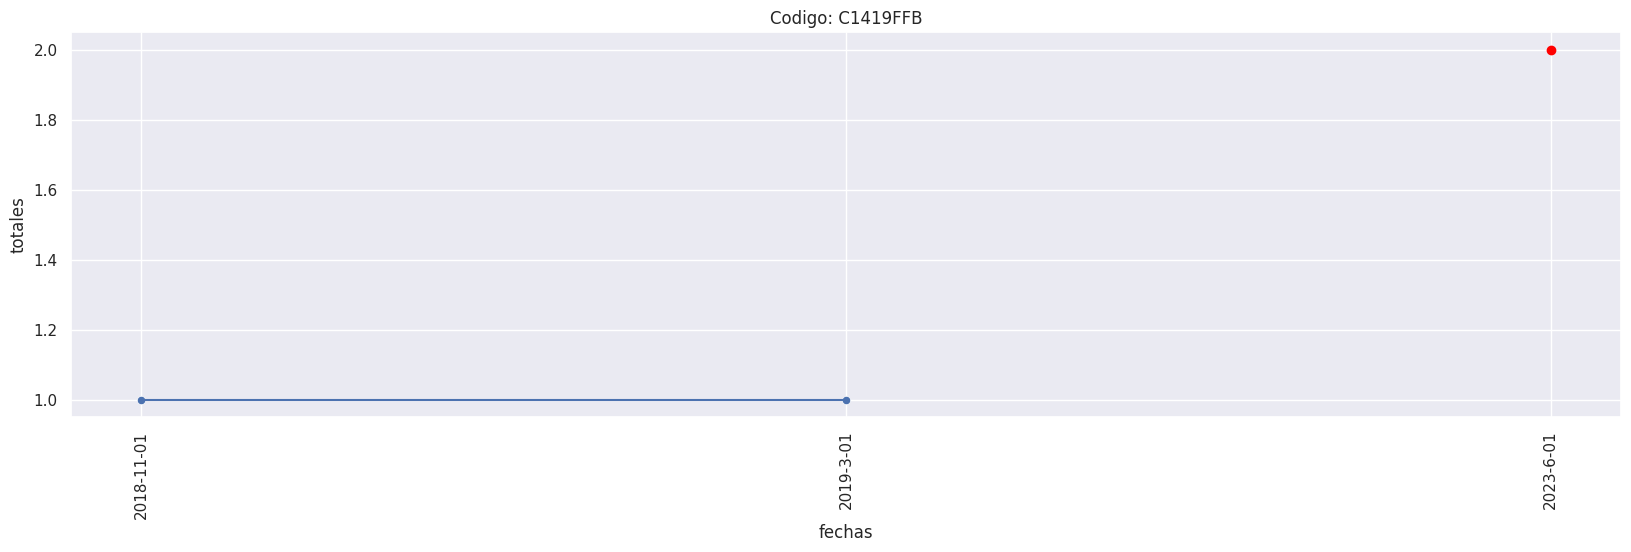

In [66]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=round(pred[0][0]), color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()